In [114]:
## Import Packages
import numpy as np
import _pickle as pk
import AA as aa
from matplotlib import pyplot as plt
import matplotlib as mpl
from netCDF4 import Dataset
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

plt.rcParams['axes.xmargin'] = 0 #default margin spacing for the edges
mpl.rc('font',size=40,**{'family':'sans-serif','sans-serif':['Arial']})
%matplotlib inline

In [115]:
Source = '/Users/johnvirgin/OneDrive - University of Waterloo/Papers/GMD_CanESM/'

In [116]:
lat = np.linspace(-87.864,87.864,64)
lon = np.linspace(0,357.1875,128)

y = lat*np.pi/180
coslat = np.cos(y)
coslat = np.tile(coslat,(lon.size,1)).T

In [161]:
print('Read in cloud fraction output')

cl_source = '/Data/CanESM2/CFMIP/Tier 1/Climatology/'
exps = ['amip','amip-future4K','amip-p4K']
style = ['amip-future4K','amip-p4K']
model = 'CanESM2'
cl = dict()
tas = dict()
for i in range(len(exps)):
    cl[exps[i]] = pk.load(open(Source+cl_source+model+'_'+exps[i]+'_clisccp_Climo.pi','rb'))
    tas[exps[i]] = pk.load(open(Source+cl_source+model+'_'+exps[i]+'_tas_Climo.pi', 'rb'))

print('cloud fraction area output shape? - ',cl[exps[0]].shape)

Read in cloud fraction output
cloud fraction area output shape? -  (12, 7, 7, 64, 128)


In [162]:
dtas['amip-p4K'].shape

(12, 64, 128)

In [163]:
dtas = dict()
for i in range(len(style)):
    dtas[style[i]] = tas[style[i]]-tas['amip']   

dtas_GAM = dict()
for keys in dtas.keys():
    print(keys, '- Global mean TAS change')
    dtas_GAM[keys] = np.average(np.nanmean(dtas[keys],axis=0), weights=coslat)
    print(dtas_GAM[keys])

amip-future4K - Global mean TAS change
4.738684371776328
amip-p4K - Global mean TAS change
4.520619175338537


In [167]:
dc = {}
climo_cl = {}
climo_cl_hi_sum = {}
climo_cl_lo_n = {}

pert_cl_hi_sum = {}
pert_cl_lo_n = {}

dc_lo_n = {}
dc_hi = {}
for keys in dtas.keys():
    dc[keys] = cl[keys]-cl['amip']
    climo_cl[keys] = cl['amip']
    climo_cl_hi_sum[keys] = np.tile(\
        np.nansum(climo_cl[keys][:,:,2:,:,:],axis=(1,2))[:,None,None,:,:],(1,7,2,1,1))

    climo_cl_lo_n[keys] = climo_cl[keys][:,:,:2,:,:]/(100-climo_cl_hi_sum[keys])
    
    pert_cl_hi_sum[keys] = np.tile(\
        np.nansum(cl[keys][:,:,2:,:,:],axis=(1,2))[:,None,None,:,:],(1,7,2,1,1))
    
    pert_cl_lo_n[keys] = cl[keys][:,:,:2,:,:]/(100-pert_cl_hi_sum[keys])

    dc_lo_n[keys] = (pert_cl_lo_n[keys]-climo_cl_lo_n[keys])*(100-climo_cl_hi_sum[keys])
    dc_hi[keys] = dc[keys][:,:,2:,:,:]

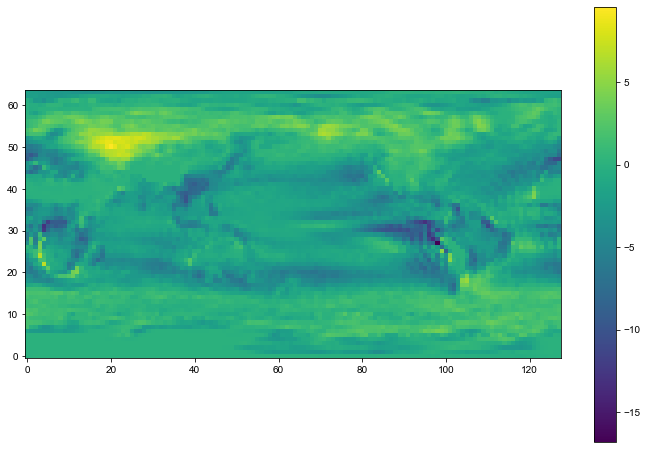

In [168]:
plt.figure(figsize=(12,8))
plt.imshow(np.nansum(np.nanmean(dc_lo_n['amip-p4K'],axis=0),axis=(0,1)))
plt.colorbar()
plt.gca().invert_yaxis()

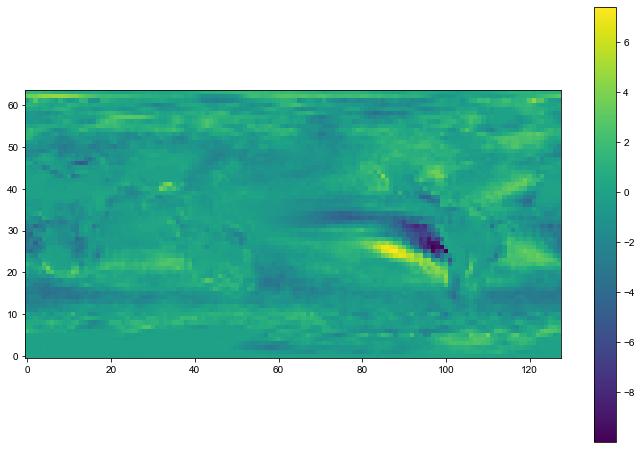

In [169]:
plt.figure(figsize=(12,8))
plt.imshow(np.nansum(np.nanmean(dc_lo_n['amip-future4K'],axis=0),axis=(0,1))-\
           np.nansum(np.nanmean(dc_lo_n['amip-p4K'],axis=0),axis=(0,1)))
plt.colorbar()
plt.gca().invert_yaxis()